# Burned in Brazil across the years

Due to the high repercurssion about the all burning tragedies happening in Brazil (and also around
the globe like in California and Australia), this notebook aims to make an analysis of data
(http://queimadas.dgi.inpe.br/queimadas/bdqueimadas/) conerning the burnings in Brazil across
the years. I decided to take the data for the last ten years and try to make some predictions
on top of it. This notebook brings the exploratory data analysis of it.

- [Spotting the years with missing relevant information](#missing_information)
- [Brazilian biome distribution in the country](#biome_distribution)
- [Analyzing the number of fire events for an specific year (2014)](#burning_events_entire_country)
    - [Plot for the precipitation and number of fire events in 2014](#fire_prec_correlation_2014_plot)
    - [Conclusion about the the aforementioned plot](#fire_prec_correlation_2014)
- [Analysis about fire events per biome in 2014](#per_biome)
    - [Creating the function to make the pertinent plots](#per_biome_function)
    - [Detailed analysis about the obtained results per biome](#per_biome_conclusion)
    - [Quantifying the timeseries analysis in a pie chart](#pie_chart2014)
    - [Showing its distribution in the Brazil map](#fire_brazil_map2014)
- [Creating functions to generalize the previous section for different years for specific a biome](#generalizing_for_different_years)
- [A detailed discussion about Pantanal](#detailed_pantanal)
- [Discussion about the number of fire events per biome through the years](#conclusion_diff_years_biome)
- [Investigating if the fire events occurred at the border of the biomes](#spreading_fire)

In [203]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
sns.set_theme(style="darkgrid")

## A first glance at the datasets

In [39]:
# Let's start with the data from 2010

df2010 = pd.read_csv('../../dataset/data2010.csv', parse_dates = True)

df2010.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2010/01/01 01:21:19,NOAA-17,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5133,-60.8516,NaN
1,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5360,-60.8710,NaN
2,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5280,-60.8670,NaN
3,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,AMAJARI,Amazonia,NaN,NaN,NaN,3.8450,-61.1000,NaN
4,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5390,-60.8510,NaN


Firstly, let's translate the name of the columns to English

FRP stands for *Fire Radiative Power*, which is the rate of energy
emitted in the form of radiation while the biom is burning.

In [40]:
df2010.rename(columns = {'datahora':'date', 'satelite': 'satellite',
                         'pais' : 'country', 'estado' : 'state', 'municipio' : 'city',
                         'bioma' : 'biome', 'diasemchuva' : 'no-rain-day',
                          'precipitacao' : 'precipitation', 'riscofogo' : 'risk-fire'}, inplace = True)

In [41]:
df2010.head()

,date,satellite,country,state,city,biome,no-rain-day,precipitation,risk-fire,latitude,longitude,frp
0,2010/01/01 01:21:19,NOAA-17,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5133,-60.8516,NaN
1,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5360,-60.8710,NaN
2,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5280,-60.8670,NaN
3,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,AMAJARI,Amazonia,NaN,NaN,NaN,3.8450,-61.1000,NaN
4,2010/01/01 02:03:00,TERRA_M-M,Brasil,RORAIMA,PACARAIMA,Amazonia,NaN,NaN,NaN,4.5390,-60.8510,NaN


In [5]:
## Let's take a look on the values of no-rain-day, precipitation and risk-fire

## days without raining

print (len(df2010), ': Total number of rows')
print(df2010['no-rain-day'].isna().sum())
print(df2010['precipitation'].isna().sum())
print(df2010['risk-fire'].isna().sum())
print(df2010['frp'].isna().sum())

1103850 : Total number of rows
1103850
1103850
1103850
1103850


<a id='missing_information'></a>

Therefore, we see that these columns have all their values NaN. If we drop them out,
we observe that we have no information abou the burned area in 2010. Assuming that there
were some burning areas in 2010 due to human actions for agriculture or due to
natural occurrence (which happens at the Cerrado biome, since it is a dry environment),
for some reason this data is not present herein this dataset.

As one could expect there were indeeda lot of burned areas during the year of 2010:

http://g1.globo.com/brasil/noticia/2010/08/inpe-aponta-novas-areas-de-queimadas-no-brasil.html

https://exame.com/mundo/queimadas-triplicaram-cerrado-2010-603748/

https://www.terra.com.br/noticias/brasil/cidades/queimadas-no-brasil-podem-causar-estrago-recorde-em-2010,794b4bc92690b310VgnCLD200000bbcceb0aRCRD.html


Let's take a look at the other years.

In [6]:
for i in range(2011, 2020):
    year = str(i)
    file = '../../dataset/data{}.csv'.format(year)
    df = pd.read_csv(file)
    print (len(df), ': Total number of rows in', i)
    print(df['diasemchuva'].isna().sum(), 'Number of NaN rows in no-rain-day')
    print(df['precipitacao'].isna().sum(), 'Number of NaN rows in precipitation')
    print(df['riscofogo'].isna().sum(), 'Number of NaN rows in risk-fire')
    print(df['frp'].isna().sum(), 'Number of NaN rows in frp')
    print(' ')

516142 : Total number of rows in 2011
516142 Number of NaN rows in no-rain-day
516142 Number of NaN rows in precipitation
516142 Number of NaN rows in risk-fire
516142 Number of NaN rows in frp
 
2562652 : Total number of rows in 2012
2562652 Number of NaN rows in no-rain-day
2562652 Number of NaN rows in precipitation
2562652 Number of NaN rows in risk-fire
2562652 Number of NaN rows in frp
 
1301623 : Total number of rows in 2013
1301623 Number of NaN rows in no-rain-day
1301623 Number of NaN rows in precipitation
1301623 Number of NaN rows in risk-fire
1301623 Number of NaN rows in frp
 
1855695 : Total number of rows in 2014
0 Number of NaN rows in no-rain-day
0 Number of NaN rows in precipitation
0 Number of NaN rows in risk-fire
1855695 Number of NaN rows in frp
 
1469000 : Total number of rows in 2015
0 Number of NaN rows in no-rain-day
0 Number of NaN rows in precipitation
0 Number of NaN rows in risk-fire
1469000 Number of NaN rows in frp
 
1982934 : Total number of rows in 20

We observe that the period $[2010,2013]$, for some reason,
it is not possible to make useful analysis. Furthermore,
we also observe that the quantification of *FRP* only
became efectively avaiable after 2018. In the 2017 there
are some few (non-NaN) data avaiable, but it still is a very
little quantity.

After loading the data, we can start doing the analysis.
Let's start by understanding the biome distribution in Brazil.

### Loading all the pertinent dataframes and renaming the columns

In [42]:
df2014 = pd.read_csv('../../dataset/data2014.csv', parse_dates = True, index_col = 'datahora')
df2015 = pd.read_csv('../../dataset/data2015.csv', parse_dates = True, index_col = 'datahora')
df2016 = pd.read_csv('../../dataset/data2016.csv', parse_dates = True, index_col = 'datahora')
df2017 = pd.read_csv('../../dataset/data2017.csv', parse_dates = True, index_col = 'datahora')
df2018 = pd.read_csv('../../dataset/data2018.csv', parse_dates = True, index_col = 'datahora')
df2019 = pd.read_csv('../../dataset/data2019.csv', parse_dates = True, index_col = 'datahora')


df_all = [df2014, df2015, df2016, df2017, df2018, df2019]

## TRANSLATING THE NAME OF THE COLUMNS

for dataframe in df_all:
    dataframe.rename(columns = {'satelite': 'satellite', 'pais' : 'country',
                                'estado' : 'state', 'municipio' : 'city',
                                'bioma' : 'biome', 'diasemchuva' : 'no-rain-day',
                                'precipitacao' : 'precipitation', 'riscofogo' : 'risk-fire'}, inplace = True)

In [43]:
df2014.head()

,satellite,country,state,city,biome,no-rain-day,precipitation,risk-fire,latitude,longitude,frp
datahora,,,,,,,,,,,
2014-10-14 17:21:00,NPP-375,Brasil,MINAS GERAIS,PASSOS,Cerrado,14,0.0,1.0,-20.6784,-46.5234,NaN
2014-10-31 17:06:00,NPP-375,Brasil,MARANHAO,SAO LUIS GONZAGA DO MARANHAO,Cerrado,5,0.5,1.0,-4.4089,-44.5070,NaN
2014-11-12 16:41:00,NPP-375,Brasil,MARANHAO,PIRAPEMAS,Cerrado,7,2.2,1.0,-3.7044,-44.1168,NaN
2014-10-28 15:45:00,MSG-03,Brasil,MARANHAO,ARARI,Cerrado,3,0.0,1.0,-3.6500,-44.6400,NaN
2014-11-01 16:47:00,NPP-375,Brasil,MARANHAO,JENIPAPO DOS VIEIRAS,Cerrado,0,0.0,1.0,-5.1990,-45.5588,NaN


## Brazilian biomes spatial distribution

For those which are not familiar, let's create a plot for the biomes spatial distribution
in the Brazil map by grouping by latitude and longitude

In [44]:
df_biome = df2014[['biome', 'latitude', 'longitude']].copy().round(1)

df_biome = df_biome.drop_duplicates(subset = ['latitude', 'longitude'])

gb_biome = df_biome.groupby('biome')

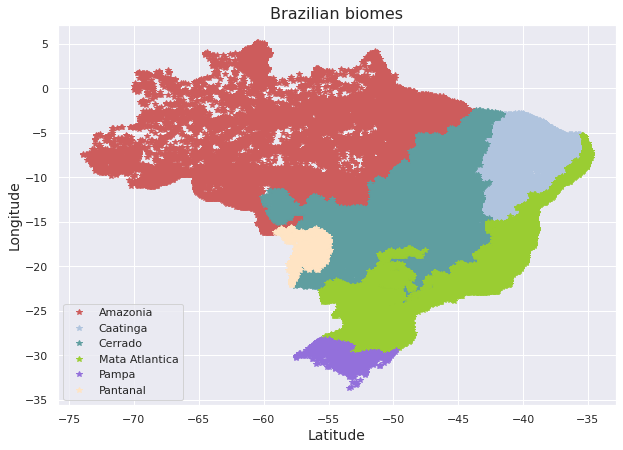

In [45]:
biomes = ['Amazonia', 'Mata Atlantica', 'Cerrado', 'Pampa', 'Caatinga', 'Pantanal']
colors = ['indianred', 'yellowgreen', 'cadetblue', 'mediumpurple', 'lightsteelblue', 'bisque']
    
color_dict = dict(zip(biomes, colors))

fig, ax = plt.subplots(figsize = (10,7))

for biome_name, df in gb_biome:
    ax.plot(df.longitude, df.latitude, marker = '*',
    label = biome_name, linestyle = '', c = color_dict[biome_name])

ax.set_xlabel('Latitude', fontsize = 14)
ax.set_ylabel('Longitude', fontsize = 14)
ax.set_title('Brazilian biomes', fontsize = 16)
ax.legend(loc = 'lower left')

plt.show()

<a id='biome_distribution'></a>

For the following plots, let's drop some undesireable columns that won't
be pertinent for us by now. First of all I am not particularly interested in the
city associated to that biome, nor the latitude and longitude (by now).
We also observed that the FRP is not a relevant infortmation until 2017.
Therefore we can drop that out as well. We are analyzing only the brazilian data.
Also, at the moment the satellite which acquired the information is not
relevant either. So let use the following dataframe

### Dropping undesirable columns

In [46]:
df2014_new = df2014[['biome', 'precipitation', 'risk-fire' ]].copy()

In [47]:
df2014_new

,biome,precipitation,risk-fire
datahora,,,
2014-10-14 17:21:00,Cerrado,0.0,1.0
2014-10-31 17:06:00,Cerrado,0.5,1.0
2014-11-12 16:41:00,Cerrado,2.2,1.0
2014-10-28 15:45:00,Cerrado,0.0,1.0
2014-11-01 16:47:00,Cerrado,0.0,1.0
...,...,...,...
2014-12-10 03:37:00,Mata Atlantica,0.2,0.4
2014-12-10 16:15:00,Caatinga,0.0,1.0
2014-12-01 15:43:00,Caatinga,0.0,0.6


### Unique values of the meaningful columns

In [14]:
print (df2014_new['risk-fire'].sort_values().unique())
print (' ')
print (df2014_new['precipitation'].sort_values().unique())

[-9.99e+02  0.00e+00  1.00e-01  2.00e-01  3.00e-01  4.00e-01  5.00e-01
  6.00e-01  7.00e-01  8.00e-01  9.00e-01  1.00e+00]
 
[0.000e+00 1.000e-01 2.000e-01 3.000e-01 4.000e-01 5.000e-01 6.000e-01
 7.000e-01 8.000e-01 9.000e-01 1.000e+00 1.100e+00 1.200e+00 1.300e+00
 1.400e+00 1.500e+00 1.600e+00 1.700e+00 1.800e+00 1.900e+00 2.000e+00
 2.100e+00 2.200e+00 2.300e+00 2.400e+00 2.500e+00 2.600e+00 2.700e+00
 2.800e+00 2.900e+00 3.000e+00 3.100e+00 3.200e+00 3.300e+00 3.400e+00
 3.500e+00 3.600e+00 3.700e+00 3.800e+00 3.900e+00 4.000e+00 4.100e+00
 4.200e+00 4.300e+00 4.400e+00 4.500e+00 4.600e+00 4.700e+00 4.800e+00
 4.900e+00 5.000e+00 5.100e+00 5.200e+00 5.300e+00 5.400e+00 5.500e+00
 5.600e+00 5.700e+00 5.800e+00 5.900e+00 6.000e+00 6.100e+00 6.200e+00
 6.300e+00 6.400e+00 6.500e+00 6.600e+00 6.700e+00 6.800e+00 6.900e+00
 7.000e+00 7.100e+00 7.200e+00 7.300e+00 7.400e+00 7.500e+00 7.600e+00
 7.700e+00 7.800e+00 7.900e+00 8.000e+00 8.100e+00 8.200e+00 8.300e+00
 8.400e+00 8.500e+00 8.

As we can see, apparently there is a logical order for the numbers
in all of the three columns. However, we observe that there is a
meaningless -999 number in *no-rain-day* and in *risk-fire*.
Taking a look at INPE's website and its images associated to
burning areas, we observe that the white color corresponds
to undetermined information. Therefore, we will assume that -999 corresponds to
that, since it is a meaningless quantity within the scale presented by them.

In [15]:
## TESTING THE replace_999 FUNCTION

import time

start = time.time()

def replace_999(element):
    if ~np.isnan(element) and int(element) == -999:
        return np.nan
    return element

df2014_new[['risk-fire']].applymap(replace_999)

end = time.time()
print(end - start)

11.1259605884552


In [16]:
import time

start = time.time()

def replace_999(element):
    if int(element) == -999:
        return np.nan
    return element

df2014_new[['risk-fire']].applymap(replace_999)

end = time.time()
print(end - start)

1.1698384284973145


 The dataset df2017 has an issue with nan values in it.
 We need to take care of it first
 
 ### Treating -999 values after some tests

In [48]:
for dataframe in df_all:
    dataframe[['risk-fire']] = dataframe[['risk-fire']].fillna(-999)
    dataframe[['risk-fire']] = \
    dataframe[['risk-fire']].applymap(replace_999)

In [49]:
df2014_new[['risk-fire']] = df2014_new[['risk-fire']].applymap(replace_999)

df2014_new.head()

,biome,precipitation,risk-fire
datahora,,,
2014-10-14 17:21:00,Cerrado,0.0,1.0
2014-10-31 17:06:00,Cerrado,0.5,1.0
2014-11-12 16:41:00,Cerrado,2.2,1.0
2014-10-28 15:45:00,Cerrado,0.0,1.0
2014-11-01 16:47:00,Cerrado,0.0,1.0


To what concerns *risk-fire* we assume that the lower bound, 0,
corresponds to having no fire and upper bound, 1, corresponds
to it is burning. First of all, we can take a look in the entire
time series for the entire country and right after check it per biome.

### Creating the dataframe of burning events

In [89]:
df2014_fire = df2014_new[df2014_new['risk-fire'] == 1].copy().drop(columns = ['biome', 'precipitation'])
df2014_fire = df2014_fire.resample('D').sum()

df2014_fire.head()

,risk-fire
datahora,
2014-01-01,615.0
2014-01-02,736.0
2014-01-03,659.0
2014-01-04,461.0
2014-01-05,410.0


<a id='burning_events_entire_country'></a>
## Burning events for the entire country

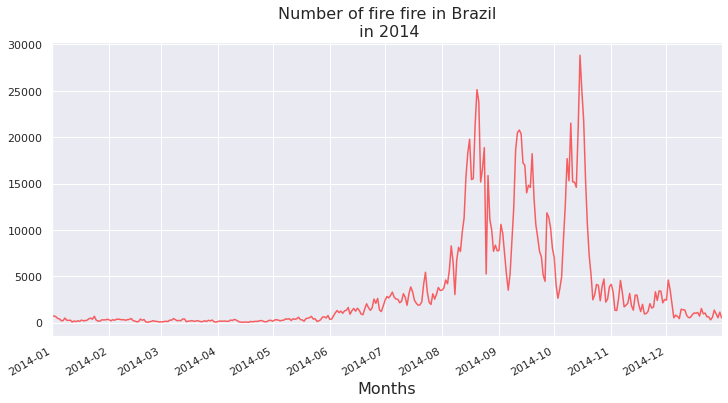

In [90]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(df2014_fire, c = 'red', alpha = 0.6)

ax.set_xlabel('Months', fontsize = 16)
ax.set_title('Number of fire fire in Brazil\n in 2014', fontsize = 16)
ax.set_xlim(df2014_fire.index[0], df2014_fire.index[-1])


plt.gcf().autofmt_xdate()
plt.show()

As we can see, there is an starting growing at the beginning of June up to August
and a huge increase between August and mid October. That is well known in Brazil
due to the humidity which gets rather low within this period. For checking so, we
can plot in an inset the humidity, *i.e.,* the *precipitation* and/or *no-rain-day*.

For doing so, we need to take into consideration the precipitation rate and we will
treat that similarly to what we have done. Let's take the average precipitation along
each day for the newcolumn which will be added

In [91]:
df2014_prec = df2014_new['precipitation'].copy()
df2014_prec = df2014_prec.resample('D').mean()

df2014_prec.head()

datahora
2014-01-01    0.400507
2014-01-02    1.523529
2014-01-03    1.157188
2014-01-04    0.835692
2014-01-05    0.991479
Freq: D, Name: precipitation, dtype: float64

### Final plot for burning events and precipitation for the entire country
<a id='fire_prec_correlation_2014_plot'></a>

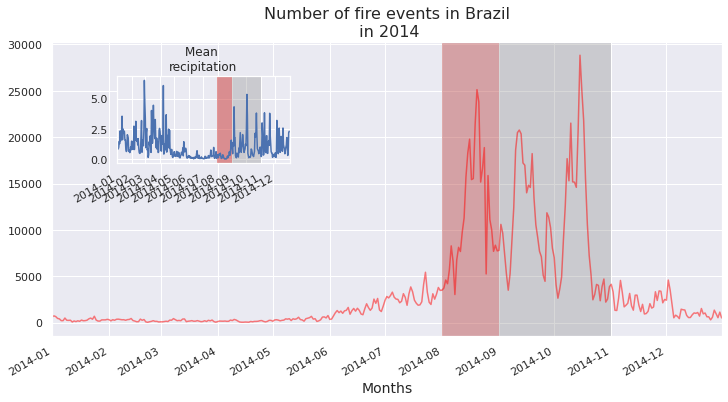

In [109]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(df2014_fire, alpha = 0.5, c = 'red')

ax.set_xlabel('Months', fontsize = 14)
ax.set_title('Number of fire events in Brazil\n in 2014', fontsize = 16)

ax.set_xlim(df2014_fire.index[0], df2014_fire.index[-1])

plt.gcf().autofmt_xdate()

## Span of the vertical bars 
x1 = datetime.date(2014, 8, 1)
x2 = datetime.date(2014, 11, 1)
x3 = datetime.date(2014, 9, 1)

ax.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)
ax.axvspan(x1, x3, color='red', alpha=0.2, lw=0)


## Creating the inset with the precipitation
ax_inset = plt.axes([0.2, 0.6, .2, .2])

ax_inset.plot(df2014_prec)
ax_inset.set_xlim(df2014_prec.index[0], df2014_prec.index[-1])

ax_inset.set_title('Mean \nrecipitation')
for label in ax_inset.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(30)

## Span of the vertical bars for the inset
ax_inset.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)
ax_inset.axvspan(x1, x3, color='red', alpha=0.3, lw=0)




plt.gcf().autofmt_xdate()
plt.show()

<a id='fire_prec_correlation_2014'></a>
### Conclusion about the previous plot

We observe, by the inset, that the precipitation starts
decreasing during April and by the end of April/beginning
of May it starts the season of very low level of precipitation.
This season goes from May up end of August (entering the yellow
shadded region, which highlights the period of biggest number
of burning events).

The burning season starts at the beginning/mid of June until
the end of August where it starts increasing in a very high rate.
We observe that within the gray shaded region, there is an increament
of the number of burning events but also the precipitation starts
increasing as well.

Note that there is a "two month preparation" of the vegetation/biomes
getting dry until the point where it starts burning in a low rate
(which stands for two months). This period is followed by three months
period of very high oscillatory burning rates).

The incredible part of all of it is that there is a short period of time,
less than a month (in red), where the number of event starts increasing
and the precipitation is still low. After that, the precipitation level
increases considerably and the burning events only decreases effectively
after two months of intercalation between burning events and higher level
of precipitation.

<a id='per_biome'></a>
## Burning events per Biome


The analysis shown above reflect the situation of the entire country.
Now we are going to take a look on it dividing it into groups of biomes.
That will allow us to identify which biomes reflect the global pattern
and those which don't. As we already have a model for that, we can easily
extrapolate it for each biome.

In [110]:
df2014_new.biome.unique()

array(['Cerrado', 'Amazonia', 'Mata Atlantica', 'Caatinga', 'Pantanal',
       'Pampa', nan], dtype=object)

In [111]:
df2014_new.biome.isna().sum()

5

In [112]:
## Since it has only 5 nan-values, lets drop them out.

print(df2014_new.shape)

df2014_new.dropna(subset = ['biome'], inplace = True)

print (df2014_new.shape)
df2014.head()

(1855695, 3)
(1855690, 3)


,satellite,country,state,city,biome,no-rain-day,precipitation,risk-fire,latitude,longitude,frp
datahora,,,,,,,,,,,
2014-10-14 17:21:00,NPP-375,Brasil,MINAS GERAIS,PASSOS,Cerrado,14,0.0,1.0,-20.6784,-46.5234,NaN
2014-10-31 17:06:00,NPP-375,Brasil,MARANHAO,SAO LUIS GONZAGA DO MARANHAO,Cerrado,5,0.5,1.0,-4.4089,-44.5070,NaN
2014-11-12 16:41:00,NPP-375,Brasil,MARANHAO,PIRAPEMAS,Cerrado,7,2.2,1.0,-3.7044,-44.1168,NaN
2014-10-28 15:45:00,MSG-03,Brasil,MARANHAO,ARARI,Cerrado,3,0.0,1.0,-3.6500,-44.6400,NaN
2014-11-01 16:47:00,NPP-375,Brasil,MARANHAO,JENIPAPO DOS VIEIRAS,Cerrado,0,0.0,1.0,-5.1990,-45.5588,NaN


<a id='per_biome_function'></a>
### Functions to make the plot per biome

In [135]:
def biome_plot(df, biome, year,
               day1 = 0, day2 = 0, month1 = 0, month2 = 0):
    
    fig, ax = plt.subplots(figsize = (14, 6))
    
    # selecting the chosen biome
    df = df[df.biome == biome]
    df = df.drop(columns = 'biome')
    
    # fire vector
    df_fire = df[df['risk-fire'] == 1]['risk-fire'].copy()
    df_fire = df_fire.resample('D').sum()
    
    # precipitation vector
    df_prec = df['precipitation'].resample('D').mean()
   
    ### PLOTTING SECTION ###
    
    ## Fire events plot##
    ax.plot(df_fire, alpha = 0.5, c = 'red')

    ax.set_xlabel('Months', fontsize = 14)
    ax.set_xlim(df_fire.index[0], df_fire.index[-1])
    ax.set_title('Number of fire events in Brazil\n in {} at the {}'.format(year, biome),
                 fontsize = 16)

    plt.gcf().autofmt_xdate()

    x1 = datetime.date(year, month1, day1)
    x2 = datetime.date(year, month2, day2)
    
    if day1 != 0 and day2 != 0:
        ax.axvspan(x1, x2, color='gray', alpha=0.2, lw=0)

    ## Mean precipitation plot ##
    ax_inset = plt.axes([0.2, 0.6, .2, .2])
    ax_inset.plot(df_prec)
    ax_inset.set_xlim(df_prec.index[0], df_prec.index[-1])

    ax_inset.set_title('Mean \nrecipitation')
    for label in ax_inset.get_xticklabels():
        label.set_ha("right")
        label.set_rotation(30)

    if day1 != 0 and day2 != 0:
        ax_inset.axvspan(x1, x2, color='gray', alpha=0.3, lw=0)
        

    plt.show()

## Plots burning events per biome

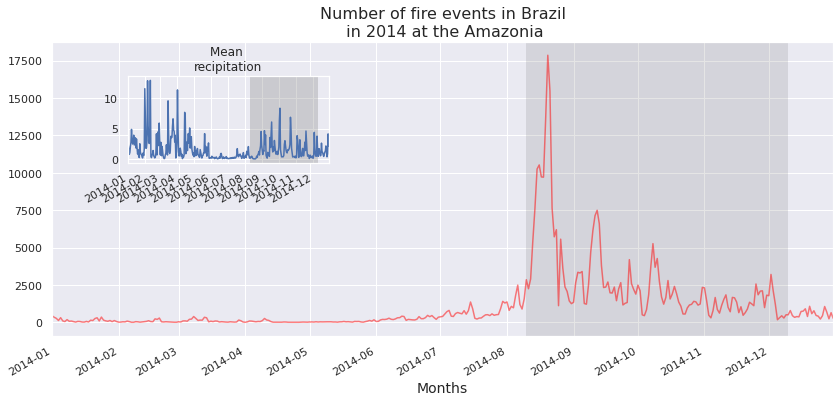

In [136]:
biome_plot(df2014_new, 'Amazonia', 2014, day1 = 10, day2 = 10, month1 = 8, month2 = 12)
#biome = 'Amazonia'
#df2014_new[df2014_new.biome == biome]
#df2014_new.drop(columns = 'biome')

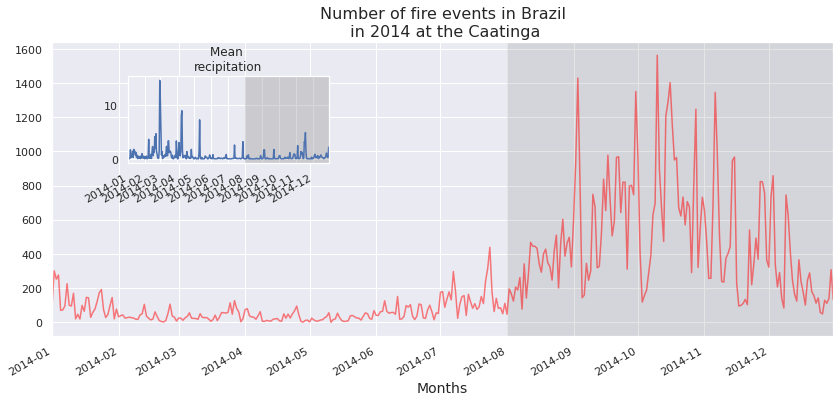

In [137]:
biome_plot(df2014_new, 'Caatinga', 2014, day1 = 1, day2 = 31, month1 = 8, month2 = 12)

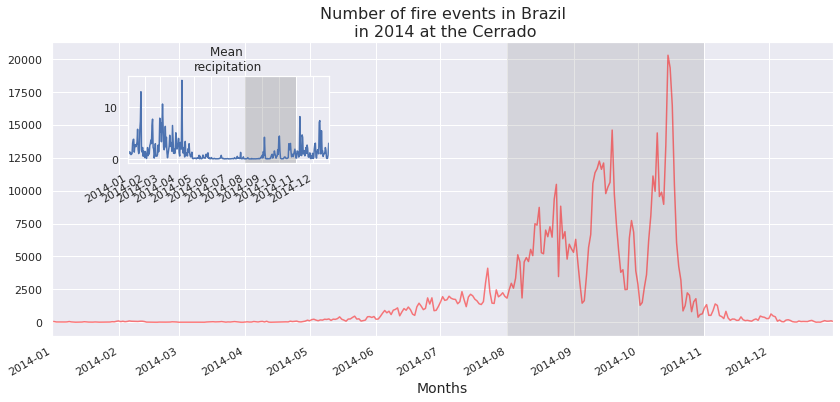

In [138]:
biome_plot(df2014_new, 'Cerrado', 2014, day1 = 1, day2 = 1, month1 = 8, month2 = 11)

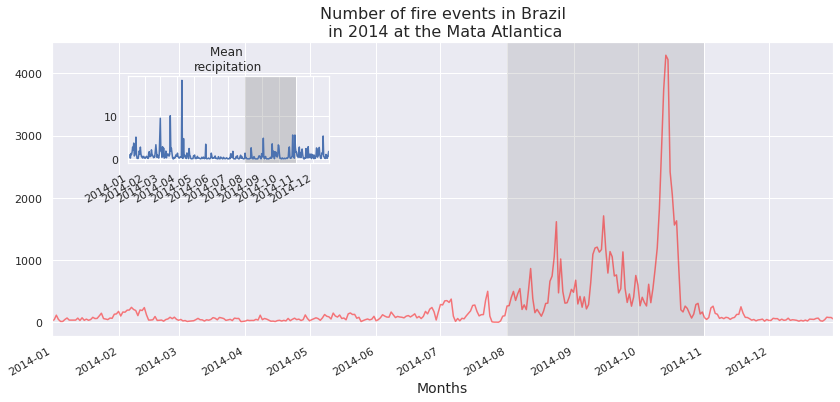

In [140]:
biome_plot(df2014_new, 'Mata Atlantica', 2014, day1 = 1, day2 = 1, month1 = 8, month2 = 11)

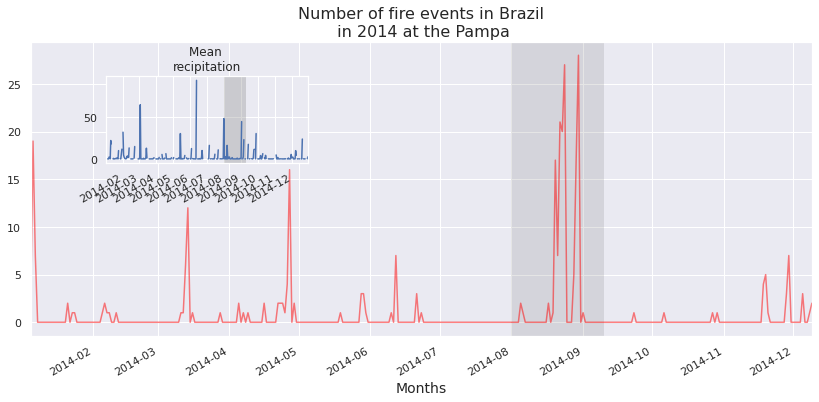

In [141]:
biome_plot(df2014_new, 'Pampa', 2014, day1 = 1, day2 = 10, month1 = 8, month2 = 9)

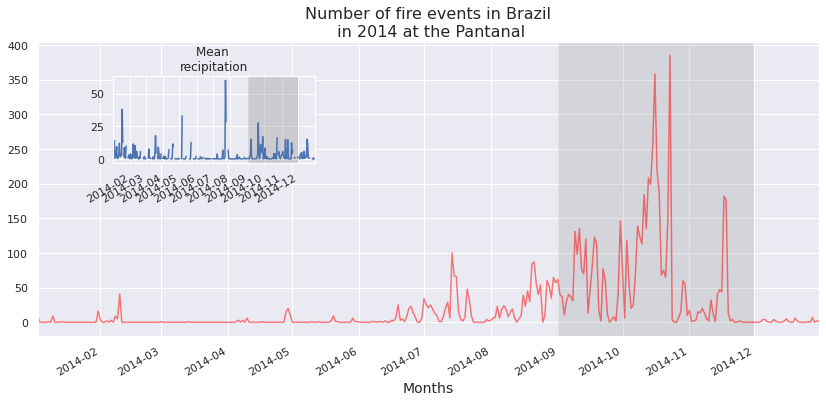

In [142]:
biome_plot(df2014_new, 'Pantanal', 2014, day1 = 1, day2 = 1, month1 = 9, month2 = 12)

<a id='per_biome_conclusion'></a>
## Discussion about the results

The graphs above give us the number of fire events throughout
2014 and the inset corresponds the precipitation in that year.
Within the shaded region, we highlight the period of the year
with the highest numbers of burning events. In the inset this
region is highlighted as well. Most of the biomes have a period
time in which there is a very low precipitation of water preceeding
the *burning season*. Now let's analyse individual aspects for each
biome.

> **Amazonia:** In this biome we observe that during
the first six months the precipitation oscillates but it is
constantly reaching higher values of it (\~6). Around June
starts the dry season with very low precipitation rate,
which lasts for approximately two months. For Amazonia biomes,
that's apparently the time required for the burning events
to start. This burning season has a peak around the mid of
August and starts oscillating and decreasing. This burning
season lasts for approximately four months. It is interesting
and alarming pointing out that: when the biome get dry enough
to burn, it has window 15-30 days where the precipitation is
still low, but right after it starts increasing to its normal
values and even though the burning events last for more three
months!

> **Caatinga:** this biome is well known in Northeast of
Brazil for having a long dry season along the year, giving
a well known whitesh color due to the lack of leafs and vegetation
and the white color acquired by the tree trunk during this time.
This fact is directly reflected by the precipitation inset, where
there is a very small time window, March-to-May, occurring
some bigger peaks an extremely long period of dry season lasting
the rest of year (in 2014 there was a peak in November).
Compared to *Amazonia*, *Caatinga* has a smaller number of
burning events but when one considers the timeline, observes
that it starts at August until the end of year. That is,
this season is elongated in the Caatinga biome, due to its
very long dry season.

> **Cerrado:** The period of the year with highest precipitations
are between January and May in *Cerrado*. It has a dry season lasting for 
for four months (May-August) and then the precipitation starts 
increasing considerably. We observe that the burning season starts
really increasing at the beginning of August and it ends by end of
October. We observe that there is an overlap of two months of big
number of burning events and high precipitation level. From these
information we observe that there is a period of three months of 
preparation of the biome (to be able to burn) a month where it burns
whitout the increament of the precipitation. After that we observe
that we need two months of precipitation to control the biome
which is burning.

> **Mata Atlantica:** In *Mata Atlantica* the period of higher precipitations
is between January and mid April. The dry season is between May and August.
However, it is interesting noting that there are a bigger oscillation
within the dry season when compared to the other biomes discussed previously.
The burning season lasts for three monts and there is an overlap of a month
between the dry season and the burning season. The two remaining months
of burning season is supressed by the increament of precipitation. This is
a feature observed in almost all biomes observed so far, but Caatinga
(which is characterized by a longer period of dry season in the year).

> **Pantanal:** *Pantanal* is characterized by high level of precipitation
and humidity. Compared to all other biomes, in 2014, Pantanal had a small number
of burning events (note that in *Amazonia*, for instance, the peak is around 16.000,
whereas in Pantanal the peak is around 300). The burning season lasts for approximatelly
four months. This difficult to burn/be set in fire, is probably due to the fact that
Pantanal has a huge precipitation throughout the year. It has a period of 5 months
constantly oscillating between zero and fifteen. Approximately a month of a dry
season, a huge precipitation peak (over than 20), then a dry season of a month
and it starts oscillating again.

> **Pantanal:** In *Pampa* we observe that there is no real *dry season*
throughout the year. The precipitation is average-wise around 5 and it is
constantly reaching values higher than ten during some periods reaching values
between fifteen and twenty. That probably explains why *Pampa* has so few
burning events compared to other biomes. It has a peak in August, but
differently to what we observe before, we don't have a dry period before
to justify that. But to ensure that we would need to analyse it is spectrum
for other years (which we are going to do later on).

<a id='pie_chart2014'></a>
## Pie chart: comparison number of burning events among the biomes
These discussions above tell us essentially about the correlation between the humidity
for a given year, but they do not tell us (graphically) the amount of burning
events per biome compared to each other. For example, *Pampa* has several peaks
throughout the year, but their peak is not bigger than 130, whereas Amazonia has
a peak over 16000. Accordingly, it is convenient to make a pieplot, for instance,
to see this information directly. The burned event is given in the dataframe *df2014_burned*

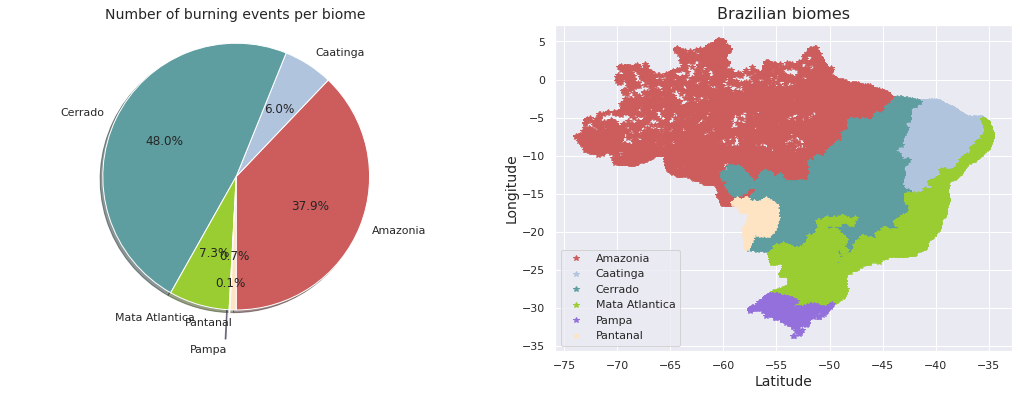

In [151]:
burned_gb = df2014_new[['biome', 'risk-fire']].groupby('biome')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))

biomes = []
burn_ev = []
colors = []
for biome, dataframe in burned_gb:
    biomes.append(biome)
    burn_ev.append(dataframe['risk-fire'].sum())
    colors.append(color_dict[biome])

ax1.pie(burn_ev, explode = (0, 0, 0, 0, 0.2, 0),
        labels = biomes, colors = colors,
        autopct='%1.1f%%',shadow=True, startangle=-90)
ax1.axis('equal')
ax1.set_title('Number of burning events per biome', fontsize = 14)

## Brazil map per biome

for biome_name, df in gb_biome:
    ax2.plot(df.longitude, df.latitude, marker = '*',
    label = biome_name, linestyle = '', c = color_dict[biome_name])

ax2.set_xlabel('Latitude', fontsize = 14)
ax2.set_ylabel('Longitude', fontsize = 14)
ax2.set_title('Brazilian biomes', fontsize = 16)
ax2.legend(loc = 'lower left')

plt.show()

<a id='fire_brazil_map2014'></a>
### Another interesting way of showing the information above is as following

In [244]:
df_fire_loc = df2014[['latitude', 'longitude', 'risk-fire']]

df_fire_loc = df_fire_loc[df_fire_loc['risk-fire'] == 1]
df_fire_loc = df_fire_loc.round(0)

fire_loc_gb = df_fire_loc.groupby(['latitude', 'longitude'])

number_events = []
lat = []
long = []

for info, dataframe in fire_loc_gb:
    lat.append(info[0])
    long.append(info[1])
    number_events.append(len(dataframe))

In [245]:
df_fire_loc = pd.DataFrame()

df_fire_loc['latitude'] = lat
df_fire_loc['longitude'] = long
df_fire_loc['number_events'] = number_events

df_fire_loc.head()

,latitude,longitude,number_events
0,-32.0,-54.0,4
1,-32.0,-53.0,6
2,-31.0,-56.0,2
3,-31.0,-55.0,7
4,-31.0,-54.0,11


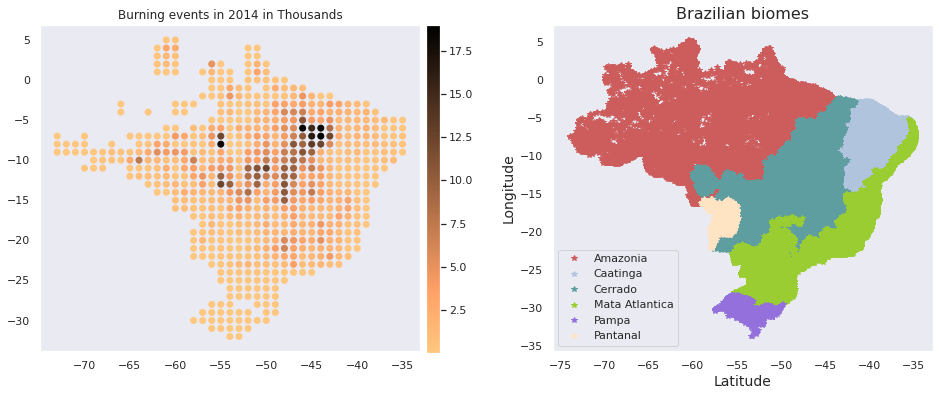

In [267]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

plot = ax1.scatter(x = df_fire_loc.longitude, y = df_fire_loc.latitude,
                   c = df_fire_loc.number_events/1000,
                   cmap = 'copper_r')#gnuplot_r
ax1.set_title('Burning events in 2014 in Thousands')


## EDITTING THE COLOR BAR POSITION

position = fig.add_axes([0.46, 0.12, 0.012, 0.76])

plt.colorbar(plot, cax=position)

plt.subplots_adjust(wspace = 0.35)

## Brazil map per biome

for biome_name, df in gb_biome:
    ax2.plot(df.longitude, df.latitude, marker = '*',
    label = biome_name, linestyle = '', c = color_dict[biome_name])

ax2.set_xlabel('Latitude', fontsize = 14)
ax2.set_ylabel('Longitude', fontsize = 14)
ax2.set_title('Brazilian biomes', fontsize = 16)
ax2.legend(loc = 'lower left')

plt.show()

## Graphical comparison

This graph turns out to be much pleasant to see rather than the pie-chart one.
However, the pie chart complements this one in a sense of quantifying it better.
So it's nice to have both of them.

Within this graph we can observe that indeed, most of the fire events occur
in Amazonia and Cerrado. It is quite well known in Brazil that the agropecuary
is mostly located within this range, it could be interesting analyze a possible
correlation between these two facts. Another interesting point to observe is that close
to the border between Mata Atlantica and Cerrado is the region in which occurs
the highest number of burning events.

### Next steps

For our next steps, I am currently interested in analyzing
what happens to the graphs that we have obtained so far
throughout the years. Although that is rather straightforward
from what we have already done, it is useful to build some
functions to automatize the process given an specific data frame.
Accordingly, the next sections are going to be devoted to the
creation of these functions.

<a id='generalizing_for_different_years'></a>
# Creating the *preparing function*

This function is going to be responsible for preparing
the dataframe to be analyzed. It is essentially
a compilation of what we have done, but it in a single function
instead, to what concerns the preparation of the data.

In [2]:
## For the implementation of this function, it is necessary to **import datetime**.

def replace_999(element):
    if int(element) == -999:
        return np.nan
    return element

def preparing_function(dataframe):
    
    ## RENAMING THE COLUMNS
    dataframe.rename(columns = {'datahora':'date', 'satelite': 'satellite',
                         'pais' : 'country', 'estado' : 'state', 'municipio' : 'city',
                         'bioma' : 'biome', 'diasemchuva' : 'no-rain-day',
                          'precipitacao' : 'precipitation', 'riscofogo' : 'risk-fire'},
                     inplace = True)
    
    ## DROPPING COLUMNS THAT WON'T BE USED
    dataframe.drop(columns = ['satellite', 'country', 'city', 'no-rain-day', 'state', 'latitude', 'longitude'],
                   inplace = True)

    ## TAKING CARE OF POSSIBLE -999 VALUES
    dataframe[['risk-fire']] = dataframe[['risk-fire']].fillna(-999)
    dataframe[['risk-fire']] = \
    dataframe[['risk-fire']].applymap(replace_999)
    
    ## PROPER TYPE OF data-time COLUMN
    dataframe['date'] = pd.to_datetime(dataframe['date']).dt.date # removing the hour-minute-second 
    dataframe.sort_values('date', inplace = True)
    dataframe.reset_index(inplace = True)
    dataframe.drop(columns = ['index'], inplace = True)
    
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['year'] = dataframe.date.dt.year
    df['day_month'] = df['date'].dt.strftime('%m-%d')
    
    return dataframe

# The burned function

The function defined below has been already defined previously
but we repeat it here for sake of completeness. It returns
the dataframe containing only those dates which occurred burned

In [3]:
df_burned_function = lambda df : df[df['risk-fire'] == 1].copy()

# Comparison for different years
For doing so, we can use the *df_burned_function*
for different dataframes and simply plot them.
Let's load the dataframes, go through the preprocessing
and creating the new dataframes containing the burned
information

In [4]:
#df2014 = pd.read_csv('Focos_2014-01-01_2014-12-31.csv')
#df2015 = pd.read_csv('Focos_2015-01-01_2015-12-31.csv')
df2016 = pd.read_csv('Focos_2016-01-01_2016-12-31.csv')
df2017 = pd.read_csv('Focos_2017-01-01_2017-12-31.csv')
df2018 = pd.read_csv('Focos_2018-01-01_2018-12-31.csv')
df2019 = pd.read_csv('Focos_2019-01-01_2019-12-31.csv')

In [5]:
#dataframes1 = [df2014, df2015, df2016, df2017, df2018, df2019]
dataframes = [df2016, df2017, df2018, df2019]

for df in dataframes:
    preparing_function(df)

#df2014.head()

In [6]:
df2014_burned = df_burned_function(df2014)
df2014_burned.head()

,date,biome,precipitation,risk-fire,frp,year,day_month
0,2014-01-01,Caatinga,0.0,1.0,NaN,2014,01-01
6,2014-01-01,Amazonia,0.0,1.0,NaN,2014,01-01
7,2014-01-01,Amazonia,0.0,1.0,NaN,2014,01-01
8,2014-01-01,Mata Atlantica,0.0,1.0,NaN,2014,01-01
9,2014-01-01,Amazonia,0.0,1.0,NaN,2014,01-01


In [6]:
## CREATING THE DFs WHERE BURNED EVENT OCCURRED ##

## To avoid possible issues, we won't create the variables dinamically.

#df2014_burned = df_burned_function(dataframes[0]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
#df2015_burned = df_burned_function(dataframes[1]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
#df2016_burned = df_burned_function(dataframes[2]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
#df2017_burned = df_burned_function(dataframes[3]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
#df2018_burned = df_burned_function(dataframes[4]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
#df2019_burned = df_burned_function(dataframes[5]).drop(columns = ['frp', 'precipitation', 'risk-fire'])

df2016_burned = df_burned_function(dataframes[0]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
df2017_burned = df_burned_function(dataframes[1]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
df2018_burned = df_burned_function(dataframes[2]).drop(columns = ['frp', 'precipitation', 'risk-fire'])
df2019_burned = df_burned_function(dataframes[3]).drop(columns = ['frp', 'precipitation', 'risk-fire'])

In [7]:
#dataframes_burned1 = [df2014_burned, df2015_burned, df2016_burned, df2017_burned,
#                    df2018_burned, df2019_burned]

dataframes_burned = [df2016_burned, df2017_burned, df2018_burned, df2019_burned]

df2019_burned.head()

,date,biome,year,day_month
1,2019-01-01,Amazonia,2019,01-01
3,2019-01-01,Amazonia,2019,01-01
5,2019-01-01,Amazonia,2019,01-01
8,2019-01-01,Amazonia,2019,01-01
9,2019-01-01,Amazonia,2019,01-01


## The plotting function

Now we are going to adapt the plotting function that
we have already developed to plot the functions per biome.
For doing so, we need to plot, for a given biome, several
dataframe information in a single plot. Let's work that out
for a single biome then generalize it for any biome
through the creation of a function.

Let's drop some extra collumns which might be just consuming
memory (for our purposes).

In [9]:
df2014_time = df2014.copy().drop(columns = ['frp', 'risk-fire', 'date'])
df2015_time = df2015.copy().drop(columns = ['frp', 'risk-fire', 'date'])
df2016_time = df2016.copy().drop(columns = ['frp', 'risk-fire', 'date'])
df2017_time = df2017.copy().drop(columns = ['frp', 'risk-fire', 'date'])
df2018_time = df2018.copy().drop(columns = ['frp', 'risk-fire', 'date'])
df2019_time = df2019.copy().drop(columns = ['frp', 'risk-fire', 'date'])

In [12]:
df2014_burned.date

0         2016-01-01
1         2016-01-01
2         2016-01-01
4         2016-01-01
5         2016-01-01
             ...    
1982929   2016-12-31
1982930   2016-12-31
1982931   2016-12-31
1982932   2016-12-31
1982933   2016-12-31
Name: date, Length: 1217060, dtype: datetime64[ns]

In [8]:
df_all = pd.concat(dataframes, ignore_index = True)
df_all_burned = pd.concat(dataframes_burned, ignore_index = True)

In [14]:
df_all_burned.tail()

,date,biome,year,day_month
7326095,2019-12-31,Cerrado,2019,12-31
7326096,2019-12-31,Amazonia,2019,12-31
7326097,2019-12-31,Amazonia,2019,12-31
7326098,2019-12-31,Amazonia,2019,12-31
7326099,2019-12-31,Cerrado,2019,12-31


In [41]:
gb_df = df_all.groupby('biome')
df_biome = gb_df.get_group('Pantanal')
#df_biome = df_biome.drop(columns = 'biome').copy()

gb_df_burned = df_all_burned.groupby('biome')
df_biome_burned = gb_df_burned.get_group('Pantanal')
#df_biome_burned = df_biome_burned.drop(columns = 'biome').copy()

In [42]:
df_biome_burned.set_index('date', inplace = True)

df_biome_burned.tail()

,biome,year,day_month
date,,,
2019-12-30,Pantanal,2019,12-30
2019-12-30,Pantanal,2019,12-30
2019-12-30,Pantanal,2019,12-30
2019-12-30,Pantanal,2019,12-30
2019-12-31,Pantanal,2019,12-31


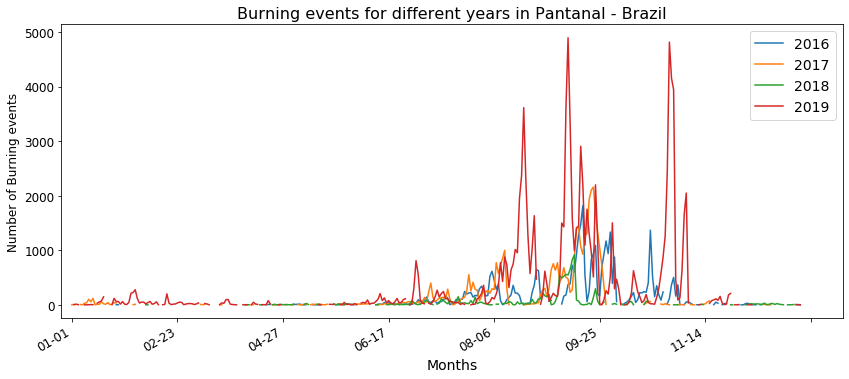

In [43]:
ax = df_biome_burned.groupby(['year', 'day_month']).count().unstack(level = 0)\
                    .plot(figsize = (14,6))

ax.set_title('Burning events for different years in Pantanal - Brazil', fontsize = 16)
ax.set_xlabel('Months', fontsize = 14)
ax.set_ylabel('Number of Burning events')

handles, labels = ax.get_legend_handles_labels()
#print (labels)

## EDITING THE LABELS
import re
new_labels = []
for label in labels:
    new_labels.append(re.search(',\s(.+?)\)', label).group(1))

ax.legend(new_labels, fontsize = 14)

## ADJUSTING THE LOCATORS AND TICKS ##

locs, labels = plt.xticks()

plt.gcf().autofmt_xdate()
ax.set_xlim(-5,365)

#for label in labels:
#    if label.get_text() != '':
#        #mdates.num2date(label.get_text())
#        #label = datetime.datetime.strptime(label.get_text(), '%M-%d').date()
#        print ((label))

plt.show()

In [18]:
## FOR LATER EDITION OF THE TICKS

months = []
for i in range(1,13):
    months.append(datetime.date(2008, i, 1).strftime('%B'))
ticks = []
for i in range(1,367):
    ticks.append(datetime.datetime.strptime(str(i), '%j'))

<a id='detailed_pantanal'></a>
### Analizying the burning events in the Pantanal Biome

This graph above shows us some astonishing effects. First of all:
it shows that throughout the years the number of burning events
are increasing. Although the year of 2018 apparently had a decreament,
compared to 2017, generally we obseve an increament throughout the years.
The number of burning events in 2019 is catastrophically high
when compared to the previous years. The biggest peaks are
as twice as in the 2017! That is huge! Beyond that, we
also observe that the first pronounced peak in 2019
occurrs mid-to-end of June whereas in 2017 (second year
with the highest number of burning events so far) the
first pronounced peak occurrs almost a month later. 
Furthermore, we also observe that (compared to 2017 as well)
whereas the last pronounced peaks occur around mid-to-end
of September in 2019 these peaks occur by the beginning of
November. It is worth pointing out that Pantanal are the
biggest tropical wetlands in the entire world. These
increasing numbers are alarmant, because these were not
supposed to happen here (differently to what happens
in some regions in Australia, US and even in Brazil).
It is worthwhile pointing out that during this period
of the year Pantanal has constant peaks of very high humidity
(around 10 in the graph already plotted).

Let's analyze the total number of events per year in a pie chart
to quantify it better

In [19]:
df_biome_burned.tail()

,biome,year,day_month
date,,,
2019-12-30,Pantanal,2019,12-30
2019-12-30,Pantanal,2019,12-30
2019-12-30,Pantanal,2019,12-30
2019-12-30,Pantanal,2019,12-30
2019-12-31,Pantanal,2019,12-31


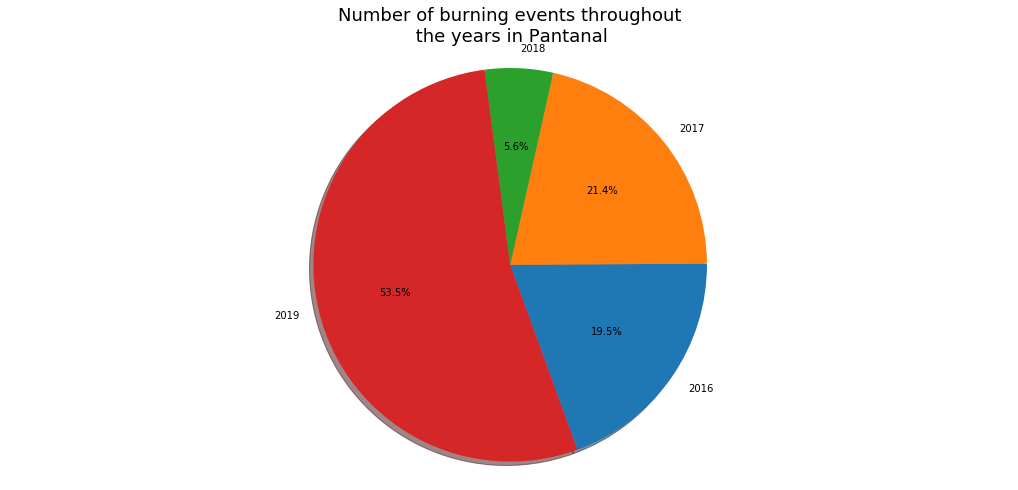

In [20]:
year_gb = df_biome_burned.groupby('year')

fig, ax = plt.subplots(figsize = (18,8))

years = []
n_events = []
for year, dataframe in year_gb:
    years.append(year)
    n_events.append(len(dataframe))

ax.pie(n_events, labels = years, autopct='%1.1f%%',shadow=True, startangle=-70)
ax.axis('equal')
ax.set_title('Number of burning events throughout\n the years in Pantanal', fontsize = 18)
plt.rcParams['font.size'] = 12
plt.show()

As we have pointed out previously, the increament is huge!
In 2019 the number of burning events is essentially the same
of the sum of all burning events of the previous five years!
These entire situation is well described in https://www.nytimes.com/2020/09/04/world/americas/brazil-wetlands-fires-pantanal.html

## Ploting function through years for each biome

The function below takes *dataframes_burned* as list
of the dataframes where burning events occurred. Each dataframe
must have gone through the preprocessing step. This function will
also plot the pie chart associated to the years, allowing us to quantify
better the amount of the burning events per biom across the years.

In [1]:
def plot_blazing_years(dataframes_burned, biome):
    df_all_burned = pd.concat(dataframes_burned, ignore_index = True)
   
    gb_df_burned = df_all_burned.groupby('biome')
    df_biome_burned = gb_df_burned.get_group(biome)
    df_biome_burned.set_index('date', inplace = True)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,6))

    df_biome_burned.groupby(['year', 'day_month']).count().unstack(level = 0)\
                    .plot(figsize = (14,6), ax = ax1)
    
    title = 'Burning events for different years in {} - Brazil'.format(biome)
    ax1.set_title(title, fontsize = 16)
    ax1.set_xlabel('Months', fontsize = 14)
    ax1.set_ylabel('Number of Burning events')

    handles, labels = ax1.get_legend_handles_labels()

    ## EDITING THE LABELS
    import re
    new_labels = []
    
    for label in labels:
        new_labels.append(re.search(',\s(.+?)\)', label).group(1))

    ax1.legend(new_labels, fontsize = 14)

    ## ADJUSTING THE LOCATORS AND TICKS ##

    locs, labels = plt.xticks()

    plt.gcf().autofmt_xdate()
    ax1.set_xlim(-5,365)
    
    year_gb = df_biome_burned.groupby('year')

    years = []
    n_events = []
    for year, dataframe in year_gb:
        years.append(year)
        n_events.append(len(dataframe))

    ax2.pie(n_events, labels = years, autopct='%1.1f%%',shadow=True, startangle=-70)
    ax2.axis('equal')
    ax2.set_title('Number of burning events throughout\n the years in {}'.format(biome), fontsize = 18)
    plt.rcParams['font.size'] = 12

    plt.show()

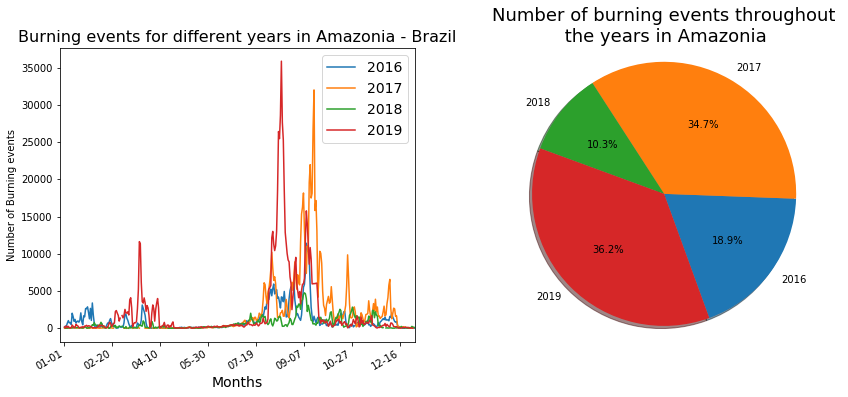

In [10]:
plot_blazing_years(dataframes_burned, 'Amazonia')

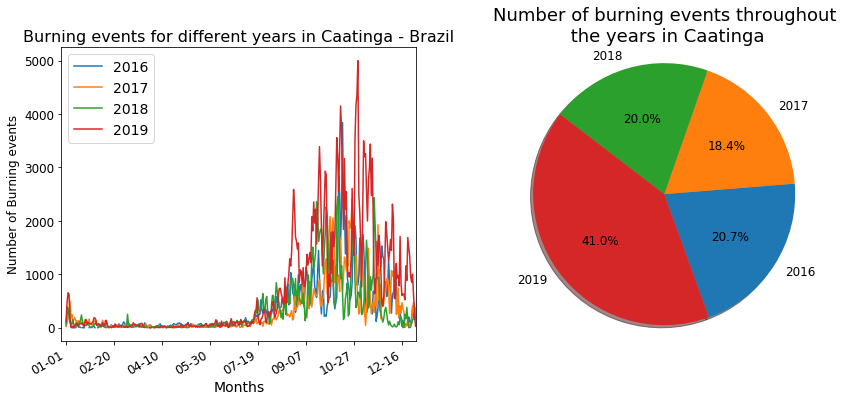

In [33]:
plot_blazing_years(dataframes_burned, 'Caatinga')

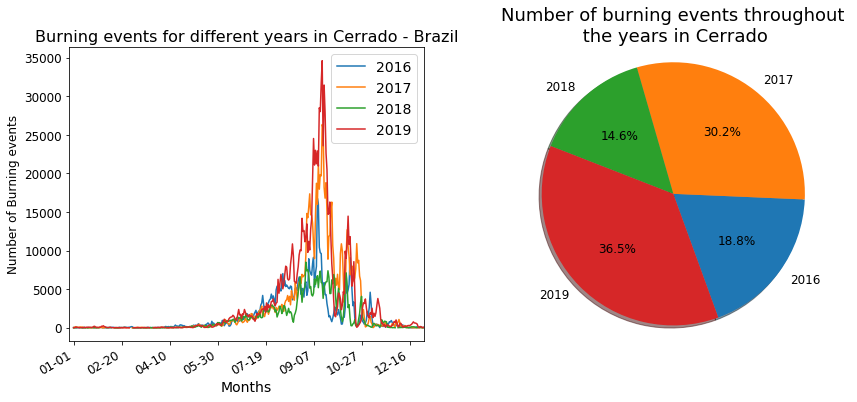

In [34]:
plot_blazing_years(dataframes_burned, 'Cerrado')

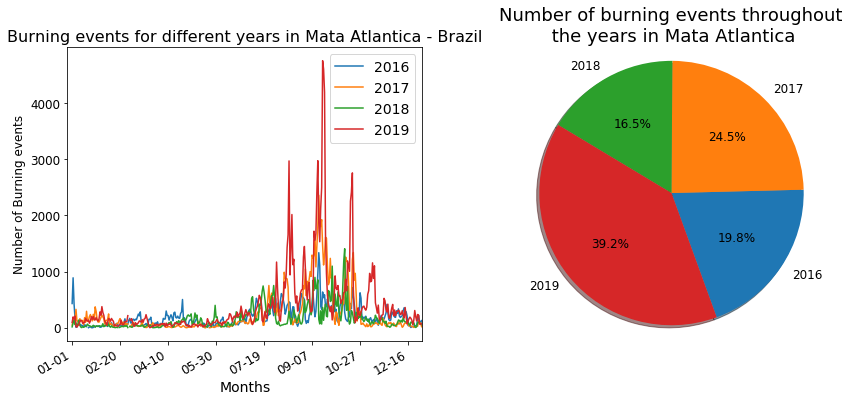

In [35]:
plot_blazing_years(dataframes_burned, 'Mata Atlantica')

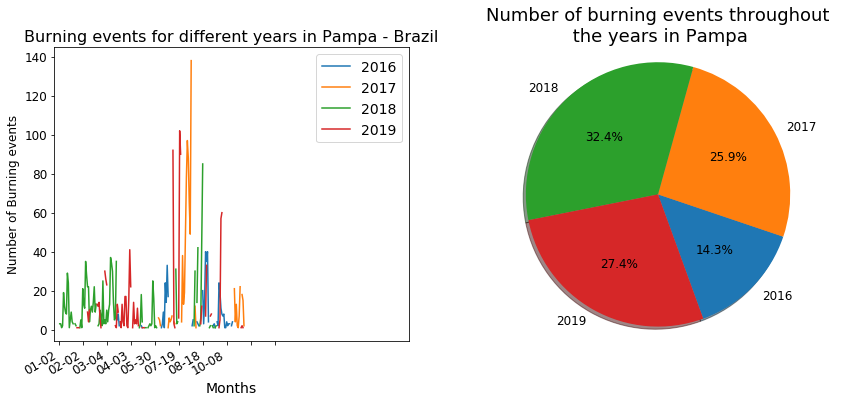

In [36]:
plot_blazing_years(dataframes_burned, 'Pampa')

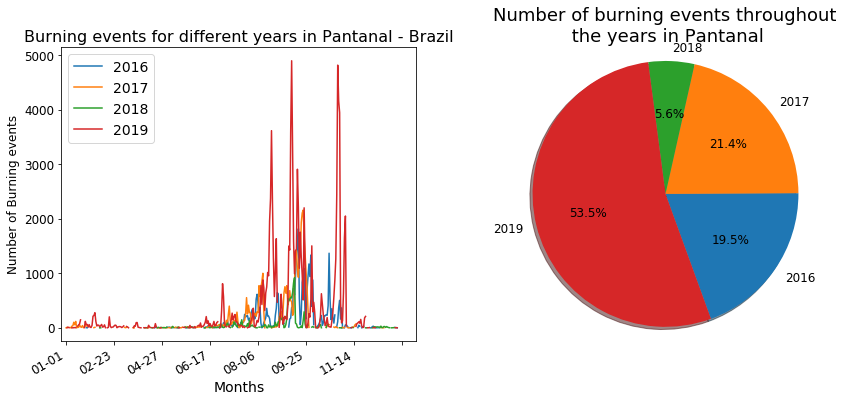

In [37]:
plot_blazing_years(dataframes_burned, 'Pantanal')

<a id='conclusion_diff_years_biome'></a>
## Discussion about the obtained results above

> **General trends:** We observe that for most biomes (except for *Pampa*)
in the last year occurred the most number of burning events. It is compared
to the number of events of *2017* and for others it is as twice as big when
compared to the preceding years (which is quite alarming).

> **Amazonia:** We observe that in Amazonia a slightly higher number of burning
events occurred in *2019* when compared to 2017. However, in *2019* we observe
a more pronounced peak within the period end-February and begin-April
(which didn't occur before). Also, we observe that the big peaks of burning events
(which start occurring two months after starting the dry season) started earlier
in that year. Perhaphs it is worth investing why (by analyzing the precipitation rate).

> **Cerrado:** We observe that it follows a similar trend that Amazonia does.
*2019* a higher number of burning events occurred ($\approx 6\%$) when compared to *2017*.
However the time-pattern throughout the years stayed the same.

> **Mata Atlantica:** We again observe a similar trend (there was no shift in the
burning season) however, the number of burning events started getting much higher.
We observe a number almost $70\%$ higher than in *2017*.

> **Caatinga:** In Caatinga we also observe a huge increament of burning events in *2019*.
Since Caatinga is a small biome (covered-area-wise) in between Mata Atlantica and
Cerrado, it might be worth plotting the burning events using latitude and longitude,
to check if it is happening  therein the proximity of Mata Atlantica (which also had
a huge increment in *2019*).

> **Pampa:** it is by far the biome less afected by the blaze catastrophe.

<a id='spreading_fire'></a>
## Investigating the possible fire spreading across different biomes

Here we investigate if the similar patterns shown by Caating and Mata atlântica are correlated and
if there was an spreading of fire across these biomes (*i.e.,* from one biome to the other). For
doing so we are going to analyse their fire distribution in the brazilian map.

In [56]:
df2019 = pd.read_csv('Focos_2019-01-01_2019-12-31.csv',
                     usecols = ['bioma', 'latitude', 'longitude', 'riscofogo'])

In [57]:
df2019.head()

,bioma,riscofogo,latitude,longitude
0,Mata Atlantica,0.2,-27.8685,-50.3362
1,Cerrado,0.7,-8.0145,-47.3369
2,Amazonia,0.5,-6.9114,-59.6976
3,Amazonia,0.5,-6.8900,-59.7000
4,Amazonia,0.5,-6.8500,-59.6600


In [58]:
df2019['latitude'] = df2019['latitude'].round(1) 
df2019['longitude'] = df2019['longitude'].round(1) 

In [59]:
df2019.head()

,bioma,riscofogo,latitude,longitude
0,Mata Atlantica,0.2,-27.9,-50.3
1,Cerrado,0.7,-8.0,-47.3
2,Amazonia,0.5,-6.9,-59.7
3,Amazonia,0.5,-6.9,-59.7
4,Amazonia,0.5,-6.8,-59.7


In [60]:
print (len(df2019))
print (len(df2019.drop_duplicates(subset = ['latitude', 'longitude'])))

df2019_map = df2019.drop_duplicates(subset = ['latitude', 'longitude']).copy()

df2019_map.head()

4041054
51362


,bioma,riscofogo,latitude,longitude
0,Mata Atlantica,0.2,-27.9,-50.3
1,Cerrado,0.7,-8.0,-47.3
2,Amazonia,0.5,-6.9,-59.7
4,Amazonia,0.5,-6.8,-59.7
8,Amazonia,0.5,-6.9,-59.6


In [61]:
##CREATING THE GROUP BY PER BIOME

gb_biome = df2019_map.groupby('bioma')

## CREATING THE INFORMATION RELATED TO CAATINGA

df2019_burned = df2019[df2019.riscofogo == 1].copy()

df2019_burned_Caatinga = df2019_burned[df2019_burned.bioma == 'Caatinga']

gb_loc = df2019_burned_Caatinga.groupby(['latitude', 'longitude'])

latitude = []
longitude = []
number_events = []

for info, df in gb_loc:
    latitude.append(info[0])
    longitude.append(info[1])
    number_events.append(df.riscofogo.sum())


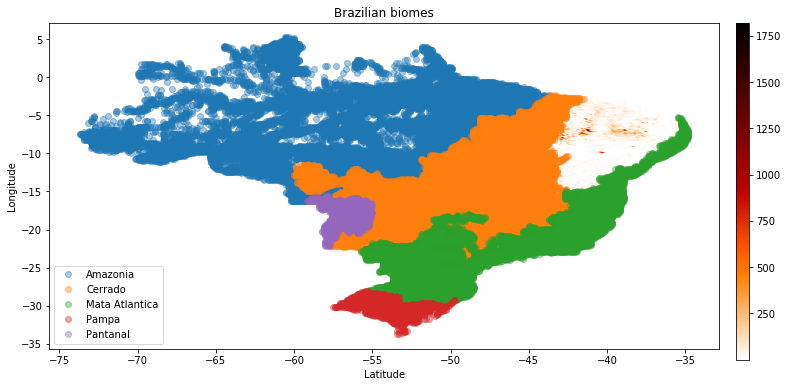

In [75]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

mpl.rcParams['agg.path.chunksize'] = 10000

plot = ax.scatter(x = longitude, y = latitude, c = number_events, cmap = 'gist_heat_r')

for biome_name, df in gb_biome:
    if biome_name != 'Caatinga':
        ax.plot(df.longitude, df.latitude, marker = 'o', label = biome_name, linestyle='', alpha = 0.4)

ax.set_title('Brazilian biomes')
ax.legend(loc = 'lower left')

## EDITTING THE COLOR BAR POSITION

position=fig.add_axes([0.92, 0.1, 0.015, 0.78])

plt.colorbar(plot, cax=position)

plt.subplots_adjust(wspace = 0.35)

plt.show()

### Analyzing our hypothesis concerning the huge increament in the blazings  in the Caatinga biome in 2019

As one easily seeswe obser that the majority of the burning events happened
therein the center-to-north region of Caatinga. We also are able to observe
that the majority of it actually happens closer to Cerrado rather than to
Mata Atlantica. Therefore, despite of observing a general increament in the
number of burning events in the whole country that year, the hypthosis of
Mata Atlantica and Cerrado being sharing the same burning events were not fullfilled.

We can also analyze a similar analysis but related to Mata Atlantica instead.

In [76]:
df2019_burned_MA = df2019_burned[df2019_burned.bioma == 'Mata Atlantica']

gb_loc = df2019_burned_MA.groupby(['latitude', 'longitude'])

latitude = []
longitude = []
number_events = []

for info, df in gb_loc:
    latitude.append(info[0])
    longitude.append(info[1])
    number_events.append(df.riscofogo.sum())


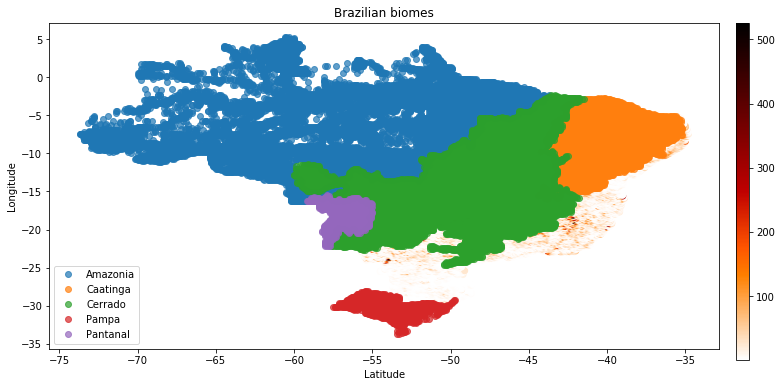

In [83]:
fig, ax = plt.subplots(figsize = (12,6))

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

mpl.rcParams['agg.path.chunksize'] = 10000

plot = ax.scatter(x = longitude, y = latitude, c = number_events, cmap = 'gist_heat_r')

for biome_name, df in gb_biome:
    if biome_name != 'Mata Atlantica':
        ax.plot(df.longitude, df.latitude, marker = 'o', label = biome_name, linestyle='', alpha = 0.7)

ax.set_title('Brazilian biomes')
ax.legend(loc = 'lower left')

## EDITTING THE COLOR BAR POSITION

position=fig.add_axes([0.92, 0.1, 0.015, 0.78])

plt.colorbar(plot, cax=position)

plt.subplots_adjust(wspace = 0.35)

plt.show()

We observe that the majority of blazes appeared closed to Cerrado rather than
Caatinga. It is worthwhile pointing out that there is indeed a set of burning
events happend in the very North of the Mata Atlantica biome, which is equivalent
to those nearby Cerrado. However, for the same latitude, the corresponding events
in Caatinga are pretty far apart and they are very unlikely correlated.